In [40]:
%matplotlib inline
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict

import xarray as xr
import numpy as np

import dask
import dask.distributed
import ncar_jobqueue

import esmlab

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import seawater as sw
from seawater.library import T90conv

In [41]:
files='/glade/scratch/kristenk/archive/G1850ECOIAF.T62_g17.preformed_cocco.001/ocn/hist/G1850ECOIAF.T62_g17.preformed_cocco.001.pop.h.0010-*' #1980
ds=xr.open_mfdataset(files,decode_times=False,decode_coords=False, concat_dim='time')

In [42]:
coccoCaCO3_mean = ds.coccoCaCO3.mean(dim='time')

In [43]:
files='/glade/work/kristenk/satellite_data/Monthly_clim_PIC/*'
ds_pic=xr.open_mfdataset(files,decode_times=False,decode_coords=False, concat_dim='time')

In [44]:
ds.TLONG

<xarray.DataArray 'TLONG' (time: 12, nlat: 384, nlon: 320)>
dask.array<shape=(12, 384, 320), dtype=float64, chunksize=(1, 384, 320)>
Coordinates:
  * time     (time) float64 3.681e+03 3.709e+03 3.74e+03 ... 3.984e+03 4.015e+03
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:  array of t-grid longitudes
    units:      degrees_east

In [45]:
#flip grid
ds_pic = ds_pic.sortby('lat', ascending=True)
ds_pic['pic'] = ds_pic.pic * 1000. #convert to units of mmol/m3 from mol/m3

In [46]:
pic_file = '/glade/work/kristenk/satellite_data/processed/PIC_mean2003to2018_1deg.nc'

In [47]:
ds_sat=xr.open_dataset(pic_file, decode_times=False)
ds_sat

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    PIC      (lat, lon) float32 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        landmask_21deg.nc
    history:      grdlandmask -Rd -I1d -Glandmask_21deg.nc -F -N0/NaN -Dl -A1...
    GMT_version:  4.5.18 [64-bit]
    node_offset:  1

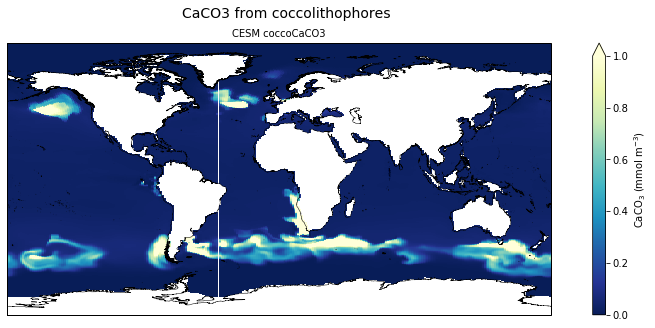

In [48]:
fig = plt.figure(figsize=(15,5))
plt.suptitle('CaCO3 from coccolithophores', fontsize=14)

#COLUMN 1  - NO3
#---- CESM panel
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM coccoCaCO3', fontsize=10)
pc1=ax.pcolormesh(ds.TLONG.isel(time=0), ds.TLAT.isel(time=0), 
                coccoCaCO3_mean.isel(z_t_150m=0), vmin=0, vmax=1, cmap='YlGnBu_r',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='CaCO$_3$ (mmol m$^{-3}$)')

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.suptitle('PIC from satellite', fontsize=14)

#COLUMN 1  - NO3
#---- CESM panel
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
#ax.set_title('CESM coccoCaCO3', fontsize=10)
pc1=ax.pcolormesh(ds_sat.lon, ds_sat.lat, 
                ds_sat.PIC/12.001, vmin=0, vmax=0.5, cmap='YlGnBu_r',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='CaCO$_3$ (mmol m$^{-3}$)')

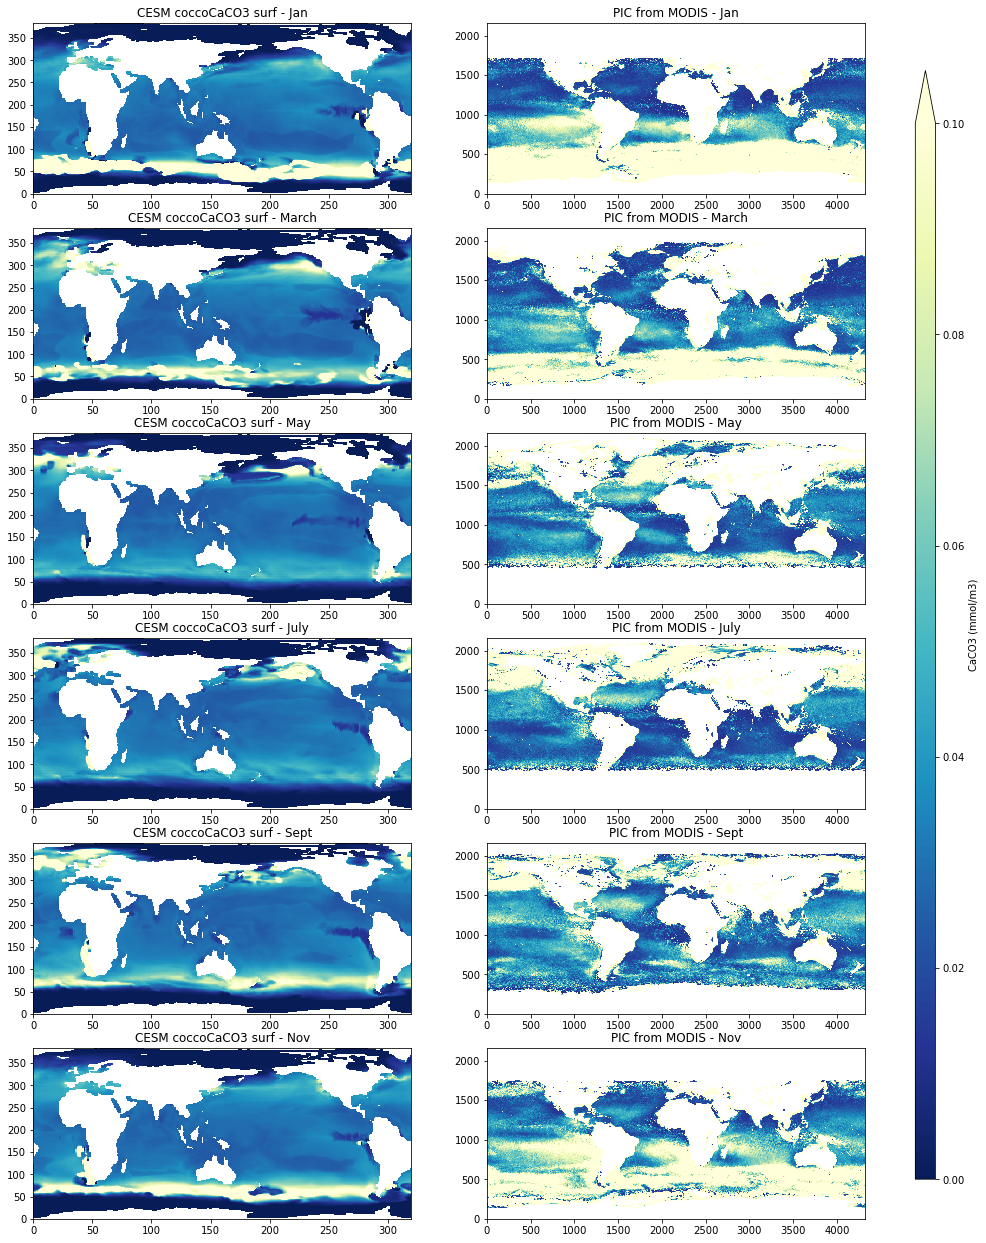

In [9]:
f, ax = plt.subplots(nrows=6,ncols=2,figsize=(14,22))


### row 1 - January
pc=ax[0,0].pcolormesh(ds.coccoCaCO3.isel(time=0, z_t_150m=0),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[0,0].set_title('CESM coccoCaCO3 surf - Jan')

pc=ax[0,1].pcolormesh(ds_pic.pic.isel(time=0),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[0,1].set_title('PIC from MODIS - Jan')

#### row 2 -March
pc=ax[1,0].pcolormesh(ds.coccoCaCO3.isel(time=2, z_t_150m=0),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[1,0].set_title('CESM coccoCaCO3 surf - March')

pc=ax[1,1].pcolormesh(ds_pic.pic.isel(time=2),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[1,1].set_title('PIC from MODIS - March')

#### row 3 -May
pc=ax[2,0].pcolormesh(ds.coccoCaCO3.isel(time=4, z_t_150m=0),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[2,0].set_title('CESM coccoCaCO3 surf - May')

pc=ax[2,1].pcolormesh(ds_pic.pic.isel(time=4),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[2,1].set_title('PIC from MODIS - May')

#### row 4 -July
pc=ax[3,0].pcolormesh(ds.coccoCaCO3.isel(time=6, z_t_150m=0),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[3,0].set_title('CESM coccoCaCO3 surf - July')

pc=ax[3,1].pcolormesh(ds_pic.pic.isel(time=6),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[3,1].set_title('PIC from MODIS - July')

#### row 5 - Sept
pc=ax[4,0].pcolormesh(ds.coccoCaCO3.isel(time=8, z_t_150m=0),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[4,0].set_title('CESM coccoCaCO3 surf - Sept')

pc=ax[4,1].pcolormesh(ds_pic.pic.isel(time=8),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[4,1].set_title('PIC from MODIS - Sept')


#### row 5 - Nov
pc=ax[5,0].pcolormesh(ds.coccoCaCO3.isel(time=10, z_t_150m=0),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[5,0].set_title('CESM spCaCO3 surf - Nov')

pc=ax[5,1].pcolormesh(ds_pic.pic.isel(time=10),vmin=0,vmax=0.1,cmap='YlGnBu_r')
ax[5,1].set_title('PIC from MODIS - Nov')


f.subplots_adjust(right=0.95)
cbar_ax = f.add_axes([1., 0.15, 0.02, 0.7])
f.colorbar(pc, cax=cbar_ax, extend='max', label='CaCO3 (mmol/m3)')

